<a href="https://colab.research.google.com/github/esraaelbaz/ML-Algorithms-from-scratch-/blob/main/linear_and_logistic_regression_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [20]:
'''
note:
X.shape returns a tuple (num_samples, num_features).
By writing num_samples, num_features = X.shape, we are unpacking this tuple into two separate variables: num_samples and num_features.
This allows us to conveniently acces
'''

'\nnote:\nX.shape returns a tuple (num_samples, num_features).\nBy writing num_samples, num_features = X.shape, we are unpacking this tuple into two separate variables: num_samples and num_features.\nThis allows us to conveniently acces\n'

In [21]:
class LinearRegression:
      # initialization function.
  def __init__(self, learning_rate=0.01, epochs=1000, random_state=42) :
    self.learning_rate = learning_rate
    self.epochs= epochs
    self.weights= None
    self.bias= None
    self.losses = []

      #  linear function
  def fit (self, X, y, random_state=42):
    num_samples, num_features = X.shape
    self.weights= np.random.rand(num_features)
    self.bias= np.random.rand()


      # Gradient Descent
    for i in range(self.epochs):
            # Compute predictions
           y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
           dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
           db = (1 / num_samples) * np.sum(y_pred - y)

            # Update parameters
           self.weights -= self.learning_rate * dw
           self.bias -= self.learning_rate * db
           mse = np.mean((y_pred - y) ** 2)
           self.losses.append(mse)


  def predict(self, X):
        return np.dot(X, self.weights) + self.bias

  def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        return mse



  def plot_loss(self):
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs Epochs')
        plt.show()

  def plot_regression_line(self, X, y):
        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X, self.predict(X), color='red', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()



In [22]:
'''
 The StandardScaler from sklearn.
 preprocessing is used to scale the features in the dataset to have a mean of 0 and a standard deviation of 1.
 This preprocessing step is commonly applied before training a machine learning model, including linear regression,
  to ensure that all features contribute equally to the model's training process.
'''


"\n The StandardScaler from sklearn.\n preprocessing is used to scale the features in the dataset to have a mean of 0 and a standard deviation of 1. \n This preprocessing step is commonly applied before training a machine learning model, including linear regression,\n  to ensure that all features contribute equally to the model's training process.\n"

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/Salary (2).csv')

data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Mean Squared Error: 27102267.745733272


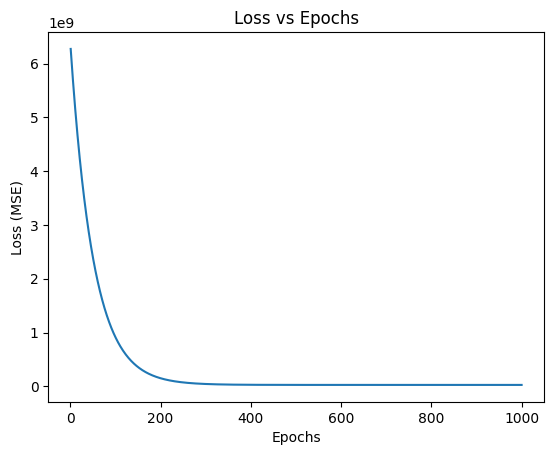

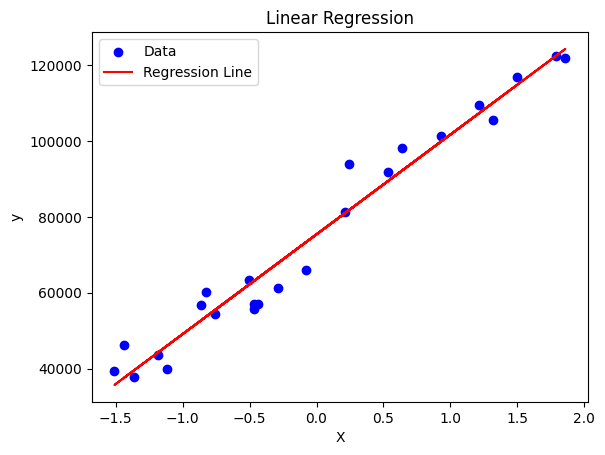

In [24]:
X = data[['YearsExperience']].values
y = data['Salary'].values

# Normalize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
mse = model.evaluate(X_train, y_train)
print("Mean Squared Error:", mse)
model.plot_loss()
model.plot_regression_line(X_train, y_train)


Mean Squared Error: 40492409.03390543


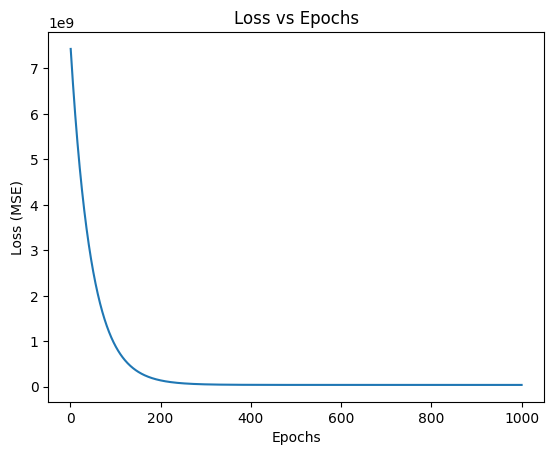

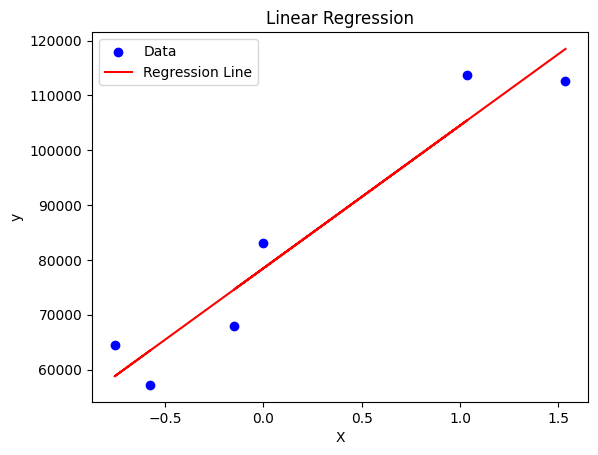

In [25]:
# Instantiate and test the model
model = LinearRegression()
model.fit(X_test, y_test)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)
model.plot_loss()
model.plot_regression_line(X_test, y_test)

In [26]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

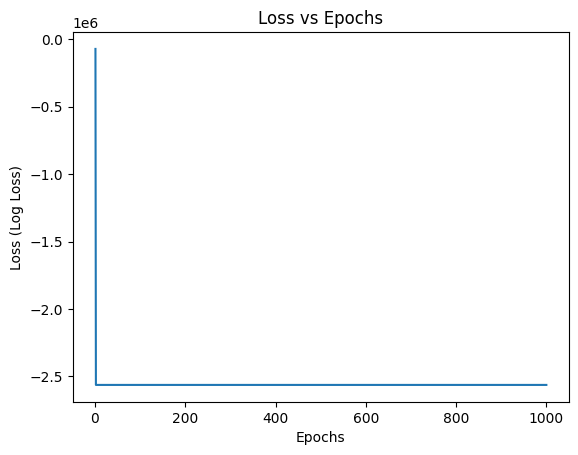

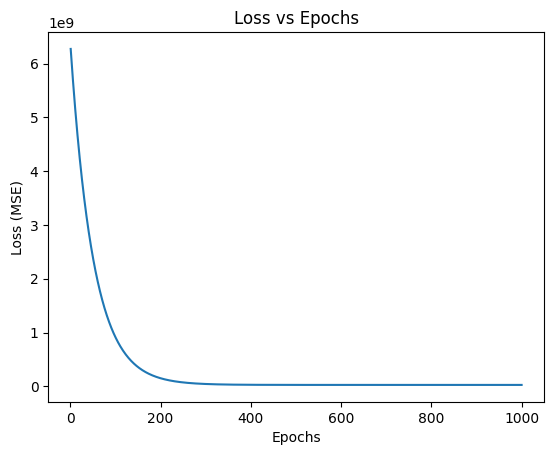

Linear Regression MSE: 49855275.474944085


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01,epochs=1000 , random_state=42):
        self.learning_rate = learning_rate
        self.epochs =epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y, random_state= 42):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = np.random.rand()

        for i in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store the log loss
            loss = self.log_loss(y, y_pred)
            self.losses.append(loss)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.round(self.sigmoid(z))

    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def plot_loss(self):
        plt.plot(range(1, len(self.losses) + 1), self.losses)
        plt.xlabel('Epochs')
        plt.ylabel('Loss (Log Loss)')
        plt.title('Loss vs Epochs')
        plt.show()

# def print_classification_report(y_true, y_pred):
#     print(classification_report(y_true, y_pred))

# Example usage:
# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Train logistic regression model
logistic_model = LogisticRegressionModel()
logistic_model.fit(X_train, y_train)

# Plot loss versus epochs for logistic regression
logistic_model.plot_loss()

# Evaluate logistic regression model
y_pred_logistic = logistic_model.predict(X_test)
# print("Logistic Regression Classification Report:")
# print_classification_report(y_test, y_pred_logistic)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot loss versus epochs for linear regression
linear_model.plot_loss()

# Evaluate linear regression model
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression MSE:", linear_model.evaluate(X_test, y_test))

